<a href="https://colab.research.google.com/github/michaellgoro/colabtogithub/blob/master/shimosaka_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# requirements
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv


# Datasets

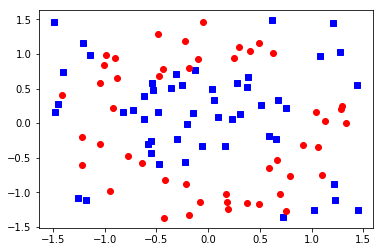

In [ ]:
# dataset 1
np.random.seed(123)
n = 100
x_d1 = 3 * (np.random.rand(n, 2)-0.5)
radius = x_d1[:,0]**2 + x_d1[:,1]**2
y_d1 = (radius > 0.7 + 0.1 * np.random.randn(n)) &( radius < 2.2 + 0.1 * np.random.randn(n))
y_d1 = 2 * y_d1 -1

plt.plot(x_d1[y_d1 < 0, 0],  x_d1[y_d1 < 0, 1], 'bs')
plt.plot(x_d1[y_d1 > 0, 0],  x_d1[y_d1 > 0, 1], 'ro')

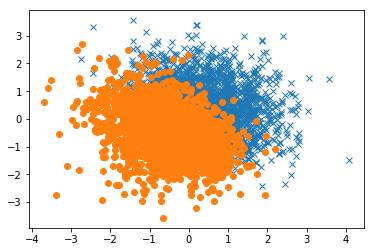

In [ ]:
# dataset 2
n = 4000
omega = np.random.randn()
noise = 0.8 * np.random.randn(n)

x_d2 = np.random.randn(n, 2) + 0
y_d2 = 2 * (omega * x_d2[:,0] + x_d2[:,1] + noise > 0) - 1

plt.plot(np.extract(y_d2>0,x_d2[:,0]),np.extract(y_d2>0,x_d2[:,1]), 'x')
plt.plot(np.extract(y_d2<0,x_d2[:,0]),np.extract(y_d2<0,x_d2[:,1]), 'o')

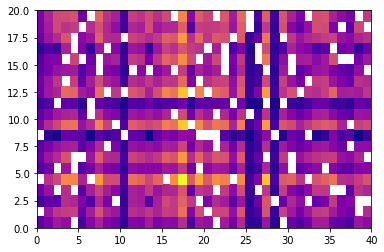

In [ ]:
#dataset3
np.random.seed(1234)
m = 20
n = 40
r = 2
A = np.dot(np.random.rand(m, r), np.random.rand(r, n)).flatten()
ninc = 100
Q = np.random.permutation(m * n)[:ninc]
A[Q] = None
A = A.reshape(m, n)

plt.pcolor(A, cmap=plt.cm.plasma)

In [3]:
# dataset 4
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1

In [ ]:
# dataset 5
n = 200
x_d5 = 3 * (np.random.rand(n, 4) - 0.5)
W = np.array([[ 2,  -1, 0.5,],
              [-3,   2,   1,],
              [ 1,   2,   3]])
y_d5 = np.argmax(np.dot(np.hstack([x_d5[:,:2], np.ones((n, 1))]), W.T)
                        + 0.5 * np.random.randn(n, 3), axis=1)

In [ ]:
# dataset 6
d_d6 = 200
n_d6 = 180

# we consider 5 groups where each group has 40 attributes
groupSize = 5
attrSize = 40
g_d6 = np.arange(groupSize*attrSize).reshape(groupSize,-1)

x_d6 = np.random.randn(n_d6, d_d6)
noise_d6 = 0.5

# we consider feature in group 1 and group 2 is activated.
w_d6 = np.vstack([20 * np.random.randn(80, 1),
                 np.zeros((120, 1)),
                 5 * np.random.rand()])
x_d6_tilde = np.hstack([x_d6, np.ones((n_d6, 1))])
y_d6 = np.dot(x_d6_tilde, w_d6) + noise_d6 * np.random.randn(n_d6, 1)

# Problem 1

In [72]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy
num_iter = 1000
n = 200
lam = 0.01
ww = np.ones(5)*3

In [45]:
y_d4.shape

(200,)

[3. 3. 3. 3. 3.]
2.4038112573469714
2.9161641514462926
0.5123528940993212


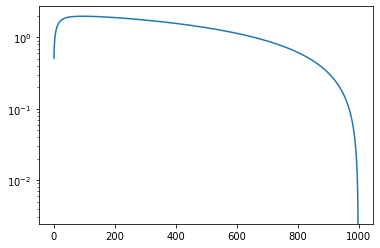

In [73]:
loss_hist_batch = [] # to store the history of loss J(w_t)
w_hist = []
alpha_base = 1 #sqrt(t)に則って更新する.
ww = np.ones(5)*3
# ww = np.random.randn(4+1) # wwの次元はxの次元+1とする. つまりxの次元が4次元であるから5次元
x_d4_ = np.hstack((x_d4, np.ones((200, 1))))
print(ww)
ll = 1/n * np.sum(np.log(1 + np.exp(-y_d4 * (np.sum(ww * x_d4_ ,axis=1))))) + lam * np.dot(ww,ww)
print(ll)
# loss_hist_batch.append(ll)
for t in range(1,num_iter + 1):
  # 1/n sigma~の部分の計算
  w_hist.append(ww)
  posterior = 1 / (1 + np.exp(-y_d4 * np.sum(ww * x_d4_,axis=1)))
  
  k = y_d4.reshape(200,1)
  k1 = k*x_d4_
  post = 1-posterior
  s = np.zeros((200,5))
  for i in range(200):
    s[i,:] = post[i] * k1[i,:] 
  direction = 1/n * np.sum(s, axis=0) + 2 * lam * ww
  # print("target",np.sum(np.log(1 + np.exp(-y_d4 * (np.sum(ww * x_d4_ ,axis=1))))))
  
  ll = 1/n * np.sum(np.log(1 + np.exp(-y_d4 * (np.sum(ww * x_d4_ ,axis=1))))) + lam * np.dot(ww,ww)
  # print(ll)
  loss_hist_batch.append(ll)
  ww = ww + alpha_base * 1.0 / np.sqrt(t) * direction


# w_time = abs(w_hist - w_hist[-1])
# J_output = []
# for w in w_time:
#   J_output.append(sum(w))
# # plt.plot(J_output)
# plt.semilogy(list(range(1, num_iter+1)),J_output)
print(loss_hist_batch[-1])
for i in range(len(loss_hist_batch)):
  # print(type(loss_hist_batch))
  loss_hist_batch[i] = abs(loss_hist_batch[i] - loss_hist_batch[-1])
print(loss_hist_batch[0])
plt.semilogy(loss_hist_batch)


[3. 3. 3. 3. 3.]
2.4038112573469714
34.22161889949856
31.817807642151585


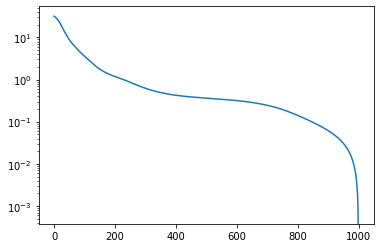

In [79]:
loss_hist_newton = [] # to store the history of loss J(w_t)
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy
num_iter = 1000
n = 200
lam = 0.01
ww = np.ones(5)*3
print(ww)

ll = 1/n * np.sum(np.log(1 + np.exp(-y_d4 * (np.sum(ww * x_d4_ ,axis=1))))) + lam * np.dot(ww,ww)
print(ll)
# loss_hist_newton.append(ll)
for t in range(num_iter):
  # 1/n sigma~の部分の計算
  w_hist.append(ww)
  posterior = 1 / (1 + np.exp(-y_d4 * np.sum(ww * x_d4_,axis=1)))
  
  k = y_d4.reshape(200,1)
  k1 = k*x_d4_
  post = 1-posterior
  s1 = np.zeros((200,5))
  for i in range(200):
    s1[i,:] = post[i] * k1[i,:]
  grad = 1/n * np.sum(s1, axis=0) + 2* lam * ww
  s2 = np.zeros(200)
  for i in range(200):
    s2[i] = post[i] * posterior[i] * np.dot(x_d4_[i,:],x_d4_[i,:])
    
  hess = 1/n * np.sum(s2) + 2*lam
  ll = 1/n * np.sum(np.log(1 + np.exp(-y_d4 * (np.sum(ww * x_d4_ ,axis=1))))) + lam * np.dot(ww,ww)
  loss_hist_newton.append(ll)
  ww = ww - grad/hess * 1.0 / np.sqrt(t+10)

print(loss_hist_newton[-1])
for i in range(len(loss_hist_newton)):
  loss_hist_newton[i] = abs(loss_hist_newton[i] - loss_hist_newton[-1])
print(loss_hist_newton[0])
plt.semilogy(loss_hist_newton)


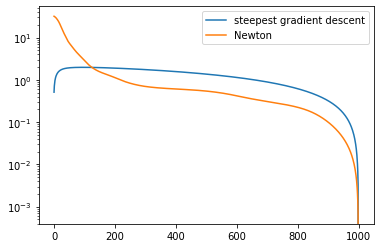

In [70]:
# plot the result
plt.plot(loss_hist_batch, label='steepest gradient descent')
plt.plot(loss_hist_newton, label='Newton')
plt.legend()
plt.yscale('log')

In [66]:
print(loss_hist_batch[-1],loss_hist_newton[-1])

0.0 0.0


In [51]:
print(loss_hist_batch[0],loss_hist_newton[0])

1.6965896065812558e-06 25903.621416897884


# Problem 2

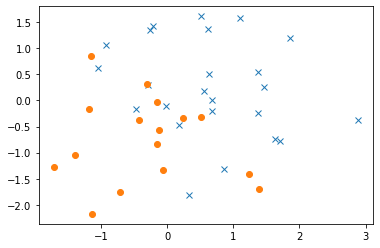

In [80]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv

# prepare dataset
np.random.seed(3846)
n = 40
omega = np.random.randn()
noise = 0.8 * np.random.randn(n)

x = np.random.randn(n, 2) + 0
y = 2 * (omega * x[:,0] + x[:,1] + noise > 0) - 1

plt.plot(np.extract(y>0,x[:,0]),np.extract(y>0,x[:,1]), 'x')
plt.plot(np.extract(y<0,x[:,0]),np.extract(y<0,x[:,1]), 'o')

In [82]:
def st_ops(mu, q):
  x_proj = np.zeros(mu.shape)
  for i in range(len(mu)):
    if mu[i] > q:
      x_proj[i] = mu[i] - q
    else:
      if np.abs(mu[i]) < q:
        x_proj[i] = 0
      else:
        x_proj[i] = mu[i] + q; 
  return x_proj

In [81]:
x_1 = np.arange(np.min(x[:,0]), np.max(x[:,0]), 0.01)
x_2 = np.arange(np.min(x[:,1]), np.max(x[:,1]), 0.01)

In [86]:
# condition
A = np.array([[  3, 0.5],
              [0.5,   1]])
mu = np.array([[1],
               [2]])
fValue = np.zeros((len(x_1), len(x_2)))
lams = [2,4,6]

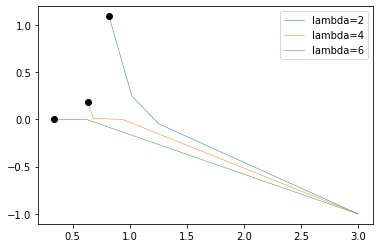

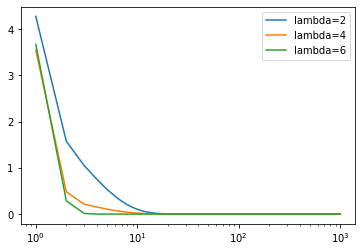

In [95]:
for lam in lams:
# def pg_method(lam, x_1, x_2, A, mu):

  for i in range(len(x_1)):
    for j in range(len(x_2)):
          inr = np.vstack([x_1[i], x_2[j]])
          fValue[i, j] = np.dot(np.dot((inr-mu).T, A), (inr- mu)) + lam * (np.abs(x_1[i]) + np.abs(x_2[j]))

  # cvx
  w_lasso = cv.Variable((2,1))
  obj_fn = cv.quad_form(w_lasso - mu, A) +  lam * cv.norm(w_lasso, 1)
  objective = cv.Minimize(obj_fn)
  constraints = []
  prob = cv.Problem(objective, constraints)
  result = prob.solve(solver=cv.CVXOPT) 
  w_lasso = w_lasso.value

  x_init = np.array([[ 3],
                    [-1]])
  L = 1.01 * np.max(np.linalg.eig(2 * A)[0])

  x_history = []
  xt = x_init
  for t in range(1000):
    x_history.append(xt.T)
    grad = 2 * np.dot(A, xt-mu)
    xth = xt - 1/L * grad
    xt = st_ops(xth, lam * 1 / L)

  x_history = np.vstack(x_history)
  plt.figure(1)
  plt.plot(x_history[:,0], x_history[:,1], markersize=3, linewidth=0.5, label="lambda=%d"%lam)
  plt.plot(w_lasso[0], w_lasso[1], 'ko')
  plt.legend()
  # plt.xlim(-1.5, 3)
  # plt.ylim(-1.5, 3)

  l1_norm = np.zeros((1000,2))
  for t in range(1000):
    l1_norm[t][0] = x_history[t, 0] - w_lasso[0]
    l1_norm[t][1] = x_history[t, 1] - w_lasso[1]
  for_plot = np.zeros(1000)
  for t in range(1000):
    for_plot[t] = abs(l1_norm[t][0]) + abs(l1_norm[t][1])
  plt.figure(2)
  # plt.semilogx(for_plot, label='lambda=%d'%lam)
  plt.semilogx(list(range(1,1001)), for_plot, label='lambda=%d'%lam)

plt.legend()


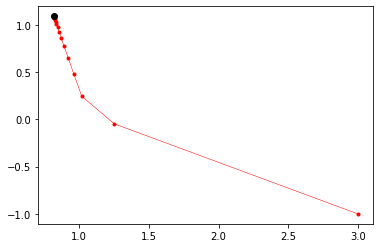

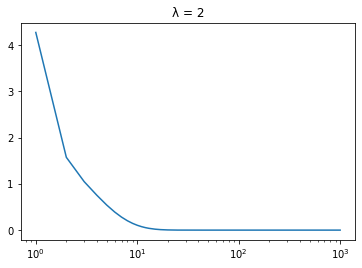

In [85]:
pg_method(2, x_1, x_2, A, mu)

## example of group lasso (using dataset 6)

In [ ]:
import cvxpy as cv
import matplotlib.pyplot as plt

def mldivide(A, b):
  piA = np.linalg.pinv(A)
  x = np.dot(piA, b)
  return x

# run the cell which preparing dataset 6 before run this cell
y = y_d6
x_tilde = x_d6_tilde
w = w_d6
noise = noise_d6
n = n_d6
d = d_d6
g = g_d6

lam = 1.0
wridge = mldivide(np.dot(x_tilde.T, x_tilde) + lam * np.eye(d+1), 
                  np.dot(x_tilde.T, y))

# cvx
west = cv.Variable((d+1,1))
obj_fn = \
  0.5 / n * cv.quad_form(x_tilde * west - y, np.eye(x_tilde.shape[0])) + \
  lam * (cv.norm(west[g[0]], 2.0) + \
         cv.norm(west[g[1]], 2.0) + \
         cv.norm(west[g[2]], 2.0) + \
         cv.norm(west[g[3]], 2.0) + \
         cv.norm(west[g[4]], 2.0) )
  
objective = cv.Minimize(obj_fn)
constraints = []

prob = cv.Problem(objective, constraints)
result = prob.solve(solver=cv.CVXOPT)

# test
x_test = np.random.randn(n, d)
x_test_tilde = np.hstack([x_test, np.ones((n, 1))])
y_test = np.dot(x_test_tilde, w) + noise * np.random.randn(n, 1)
y_pred = np.dot(x_test_tilde, west.value)
print(np.mean((y_pred - y_test)**2))

8.659234266599729


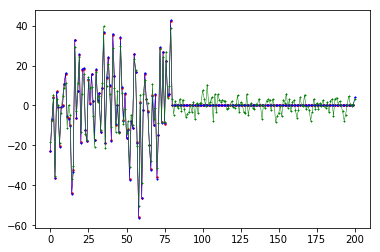

In [ ]:
plt.plot(west.value[0:d], 'r-o', markersize=1.5, linewidth=0.5)
plt.plot(w, 'b-*', markersize=1.5, linewidth=0.5)
plt.plot(wridge, 'g-+', markersize=1.5, linewidth=0.5)

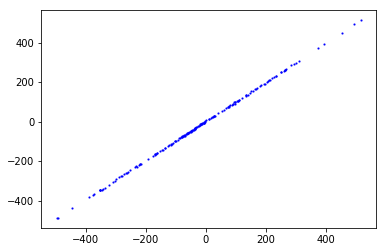

In [ ]:
plt.plot(y_test, y_pred, 'bs', markersize=1)

In [ ]:
print('carinality of w hat: %d'%sum(np.abs(west.value) < 0.01))
print('carinality of w ground truth: %d'%sum(np.abs(w) < 0.01))

carinality of w hat: 120
carinality of w ground truth: 120
